In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
epsilon = 1e-5

# 感知机

输入空间$\mathcal{X}\in \mathbf{R}^n$，输出空间$\mathcal{Y}\in \{+1,-1\}$，映射如下
$$f(x) = \text{sign}(w\cdot x+b)$$
有一点需要注意的是**感知机假设数据集是线性可分的**，也就是会有一个分割超平面会把数据集完全正确的分隔开

输入空间中一点$x_0$到超平面的距离为
$$\frac{|w\cdot x_0 + b|}{\|w\|}$$
由于在超平面下的分类结果为
$$
y_i = \left\{\begin{matrix}
+1 & w\cdot x_i +b > 0 \\ 
-1 & w\cdot x_i +b < 0
\end{matrix}\right.
$$
误分类点可判定为$-y_i(w\cdot x_i +b)>0$
损失函数设定为误分类点的集合为$M$到超平面的总距离为，
$$
\sum_{x_i\in M}\frac{-y_i(w\cdot x_i +b)}{\|w\|}
$$
不考虑$\frac{1}{\|w\|}$，损失函数为
$$
L(w,b) = -\sum_{x_i\in M}y_i(w\cdot x_i+b)
$$
最小化需要对其求梯度
$$
\nabla_wL(w,b) = -\sum_{x_i\in M}y_ix_i \\
\nabla_bL(w,b) = -\sum_{x_i\in M}y_i
$$

进行梯度下降的时候需要注意，每次只选取一个误分类点$(x_i,y_i)$进行梯度下降
$$
w \leftarrow w+\eta y_ix_i \\
b \leftarrow b + \eta y_i
$$

**如果原始数据集线性不可分，会陷入无限循环**

In [3]:
def perceptron(X, Y, eta):
    w = np.zeros(X.shape[1])
    b = 0
    M = []
    def get_M():
        M.clear()
        for index, (x, y) in enumerate(zip(X, Y)):
            if y*(np.dot(w, x) + b) <= 0:
                M.append(index)
        return M
    while len(get_M()) > 0:
        i = np.random.choice(M)
        x, y = X[i], Y[i]
        w = w + eta * y * x
        b = b + eta * y
    return w, b

### 例2.1

In [21]:
## 例2.1
X = np.array([[3,3],[4,3],[1,1]])
Y = np.array([1, 1, -1])
w, b = perceptron(X, Y, 1)
w, b

(array([1., 1.]), -3)

[0, 6, 0, 6]

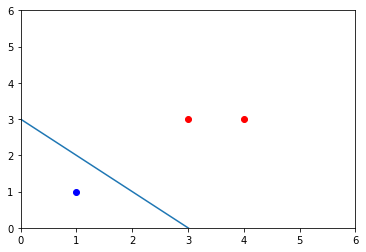

In [22]:
postive_X = X[np.where(Y>0)]
plt.plot(postive_X[:,0], postive_X[:,1], 'ro')
negative_X = X[np.where(Y<0)]
plt.plot(negative_X[:,0], negative_X[:,1], 'bo')
aX = np.arange(0, 6, 0.1)
aY = (-b - w[0]*aX)/(w[1]+epsilon)
plt.plot(aX, aY)
plt.axis([0,6, 0, 6])